In [1]:
import pandas as pd
import numpy as np

import re
import string

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.patches import Arc, Circle, Rectangle
import itertools

from scipy import spatial

In [3]:
df = pd.read_csv('csv_files/Player_comparison_df.csv', index_col = 0)

In [4]:
X = df.drop(columns = ['PLAYER_ID', 'Pos', 'Player'])

In [5]:
# function to go through all of the players, and find the most similar player to them using euclidean distance

def similarity(features, df):
    
    #creates a dictionary to store all the results
    similarities = {}

    #first the outer loop to go through all of the players
    for i in range(0, len(df)):
        
        # initializing a random best similarity since we want to find the smallest number we use this as the initial
        best_similarity = 1000000

        # second loop to go through the players again
        for j in range(0, len(df)):
            
            # make sure the same player doesnt match with himself as the similarity distance is 0
            if i != j:
                
                # Finding the similarity score for each combination of players
                similarity = spatial.distance.euclidean(features.iloc[i], features.iloc[j])

                # if the score is lower then the previous it resets and saves that index
                if similarity < best_similarity:
                    
                    # change the new best similarity
                    best_similarity = similarity
                    
                    # save the index of that similarity
                    holder = j

        # store the player with his most comparable player
        similarities[df.iloc[i].Player] = df.iloc[holder].Player
        
    return similarities

## Similarities using the box score stats, the defensive metrics and the shooting locations

In [6]:
similarity(X, df)

{'Vince Carter': 'Troy Daniels',
 'Tyson Chandler': 'Ed Davis',
 'LeBron James': 'Russell Westbrook',
 'Carmelo Anthony': 'Jeremy Lamb',
 'Kyle Korver': 'Vince Carter',
 'Udonis Haslem': 'Antonius Cleveland',
 'Dwight Howard': 'DeAndre Jordan',
 'Andre Iguodala': 'Nicolas Batum',
 'Trevor Ariza': 'Trey Lyles',
 'Marvin Williams': 'Treveon Graham',
 'Chris Paul': 'Khris Middleton',
 'Ian Mahinmi': 'Jahlil Okafor',
 'CJ Miles': 'Iman Shumpert',
 'Lou Williams': 'Jamal Murray',
 'LaMarcus Aldridge': 'Joel Embiid',
 'Rudy Gay': 'Jeremy Lamb',
 'JJ Redick': 'Bryn Forbes',
 'Thabo Sefolosha': 'DJ Wilson',
 'Rajon Rondo': 'Gorgui Dieng',
 'Kyle Lowry': 'Fred VanVleet',
 'PJ Tucker': 'Langston Galloway',
 'Paul Millsap': 'Kris Dunn',
 'JJ Barea': 'Raul Neto',
 'Al Horford': 'Myles Turner',
 'Mike Conley': 'Damion Lee',
 'Jeff Green': 'Thon Maker',
 'Thaddeus Young': 'Norman Powell',
 'Marco Belinelli': 'Kyle Korver',
 'Jared Dudley': 'Chandler Parsons',
 'Wilson Chandler': 'Rodney McGruder',
 

## Similarities using only the box score and the shooting locations

In [7]:
# importing just the player shooting and stats

player_stats = pd.read_csv('csv_files/Player_comparison_player_bios.csv', index_col = 0)
player_shooting = pd.read_csv('csv_files/Player_comparison_Shot_Profiles.csv', index_col = 0)

### Cleaning the names and concating the basketball reference player bios with the shooting stats

In [8]:
# applying the cleaning for both of the dataframes.
# the punctuation replacment is for both, the special characters are mostly for the basketball reference players

def clean_names(name):
    name = re.sub('[%s]' % re.escape(string.punctuation), '', name)
    name = re.sub('ć', 'c', name)
    name = re.sub('Ć', 'C', name)
    name = re.sub('Ž', 'Z', name)
    name = re.sub('č', 'c', name)
    name = re.sub('Č', 'C', name)
    return name

# creating an object that applys the cleaning function to all of the rows of a column instead of on the column
cleaning = lambda x: clean_names(x)

In [9]:
# applying the cleaner to both the shot charts/defensive stats from nba_api and basketball reference

player_shooting['Player'] = pd.DataFrame(player_shooting.Player.apply(cleaning))
player_stats['Player'] = pd.DataFrame(player_stats.Player.apply(cleaning))

In [10]:
# merging the 2 dataframes on the player column 

all_stats = pd.merge(player_shooting, player_stats, on = 'Player')

In [11]:
# filling any remaining na values with 0s

all_stats = all_stats.fillna(0)

In [12]:
all_stats.to_csv('csv_files/Player_comparison_wo_defense_df.csv')

In [187]:
# creating new features

X2 = all_stats.drop(columns = ['PLAYER_ID', 'Pos', 'Player'])

In [218]:
# running the similarity score again

Player_similarity = similarity(X2, all_stats)

In [223]:
Player_similarity

{'Aaron Gordon': 'Eric Bledsoe',
 'Aaron Holiday': 'Cam Reddish',
 'Abdel Nader': 'Jordan McLaughlin',
 'Adam Mokoka': 'Dean Wade',
 'Admiral Schofield': 'DeMarre Carroll',
 'Al Horford': 'Myles Turner',
 'AlFarouq Aminu': 'DeMarre Carroll',
 'Alec Burks': 'Goran Dragic',
 'Alen Smailagic': 'Jaylen Hoard',
 'Alex Caruso': 'James Johnson',
 'Alex Len': 'Bismack Biyombo',
 'Alfonzo McKinnie': 'Nassir Little',
 'Alize Johnson': 'Juwan Morgan',
 'Allen Crabbe': 'Troy Daniels',
 'Allonzo Trier': 'Tim Frazier',
 'Amile Jefferson': 'Josh Magette',
 'Amir Coffey': 'Rayjon Tucker',
 'Andre Drummond': 'Ben Simmons',
 'Andre Iguodala': 'Nicolas Batum',
 'Andrew Wiggins': 'Jrue Holiday',
 'Anfernee Simons': 'Cam Reddish',
 'Anthony Davis': 'Julius Randle',
 'Anthony Tolliver': 'Troy Daniels',
 'Antonius Cleveland': 'Justin Anderson',
 'Aron Baynes': 'Derrick White',
 'Austin Rivers': 'Kent Bazemore',
 'Avery Bradley': 'Frank Ntilikina',
 'BJ Johnson': 'KZ Okpala',
 'Bam Adebayo': 'Hassan Whiteside

## Comparing shot charts between players the similarity matrix says are similar

In [2]:
shot_chart = pd.read_csv('csv_files/2019-20_nba_shot_charts.csv')

In [3]:
from mod_5_functions import draw_court

In [4]:
Harden = shot_chart[shot_chart.PLAYER_NAME == 'James Harden']
Doncic = shot_chart[shot_chart.PLAYER_NAME == 'Luka Doncic']

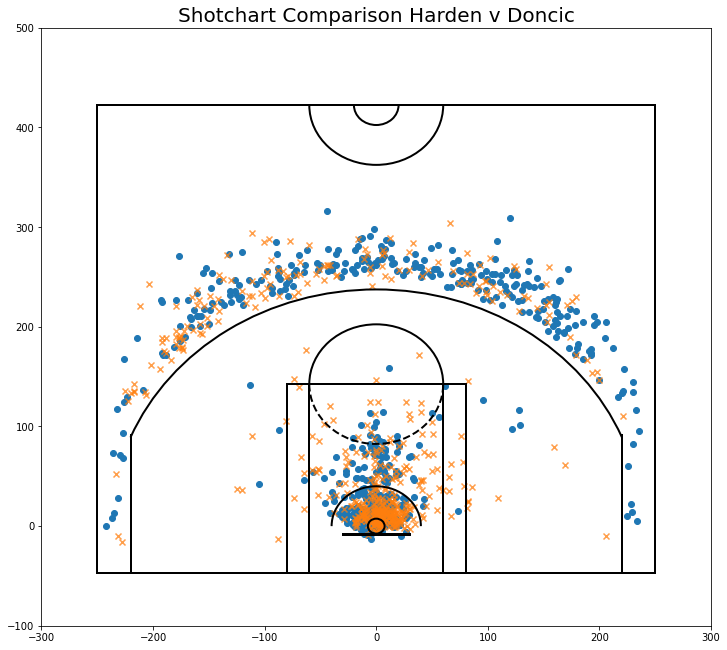

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(12,11))
plt.title('Shotchart Comparison Harden v Doncic', fontdict = {'fontsize': 20})
plt.scatter(Harden.LOC_X, Harden.LOC_Y, marker = 'o')
plt.scatter(Doncic.LOC_X, Doncic.LOC_Y, marker = 'x', alpha = .75)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()


plt.savefig('Images/Harden_Doncic_shot_comparison.png')

## Saving the results

In the end what i decided to use was the player similarities without the advanced defensive tracking numbers. This is because the actual comparisons themselves were still very similar with and without the defensive stats, so it felt like they didnt bring much in the way of value. And secondly because there was not that much data for it using the defensive status cut my player base down from almost 500 to less than 300. This is a problem not just because i now have less players to look at but then each player has over 200 less options to be compared to.

In [219]:
import pickle

In [220]:
with open('Player_similarity_dict', 'wb') as handle:
    pickle.dump(Player_similarity, handle, protocol=pickle.HIGHEST_PROTOCOL)